In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

In [ ]:
%cd 'drive/MyDrive/Colab Notebooks/Машинное обучение/Семинары'

/content/drive/MyDrive/Colab Notebooks/Машинное обучение/Семинары


In [ ]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
print(faces.DESCR)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (w

In [ ]:
X = faces.data
Y = faces.target

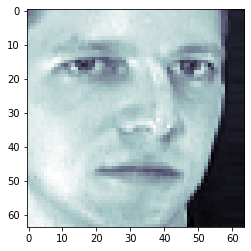

In [ ]:
plt.imshow(faces.images[1], cmap=plt.cm.bone)

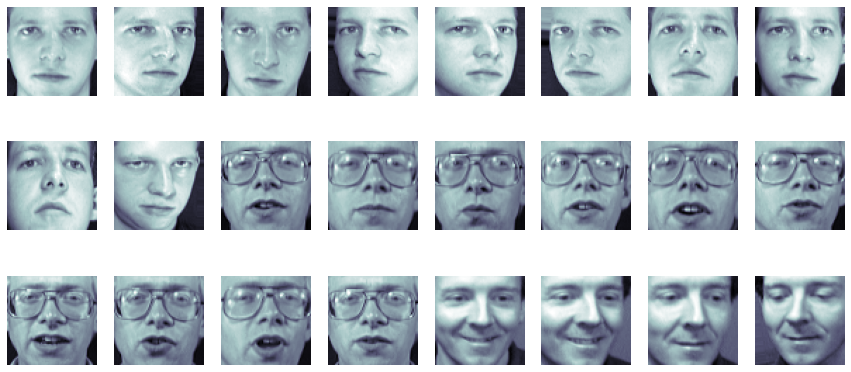

In [ ]:
# Визуализация

fig = plt.figure(figsize=(15, 7)) # create a new figure window

for i in range(24): # display 20 images
    # subplot : 4 rows and 5 columns
    img_grid = fig.add_subplot(3, 8, i+1)
    # plot features as image
    img_grid.imshow(faces.images[i], cmap=plt.cm.bone)
    img_grid.axis("off")

plt.show()

# Что предсказываем

In [ ]:
df_differences = pd.DataFrame(columns=['Тип модели классификации', 'Accuracy_score', 'Precision_score', 'Recall_score', 'F1_score'])

## Сплитим нашу выборку 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                    random_state=True)

## Построим модель классификатора с использованием различных метод для идентификации человека по изображению

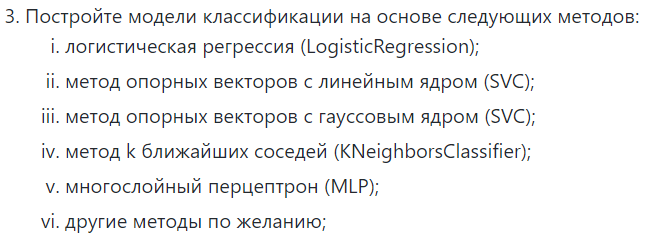

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
         Draw the learning curve of data on a model.
         Parameter explanation
    ----------
         estimator: The classifier you use.
         title: The title of the table.
         X: input feature, numpy type
         y: input target vector
         ylim: (ymin, ymax) in tuple format, set the lowest point and highest point of the ordinate in the image
         cv: When doing cross-validation, the data is divided into the number of copies, one of which is used as the cv set, and the remaining n-1 copies are used as training (default is 3 copies)
         n_jobs: the number of parallel tasks (default 1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
 
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
 
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"train_sample")
        plt.ylabel(u"score")
        plt.gca().invert_yaxis()
        plt.grid()

 
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"train_score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"cross_validation_score")
        plt.gca().invert_yaxis()
        plt.legend(loc="best")
 
        plt.draw()
        plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

4.871044158935547 seconds время обучения модели LogisticRegression


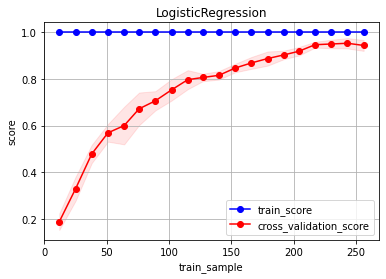

0.25919127464294434 seconds время обучения модели Метод опорных векторов с линейным ядром (SVC)


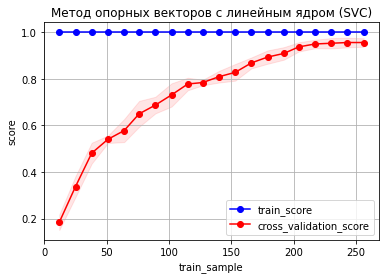

0.28674888610839844 seconds время обучения модели Метод опорных векторов с гауссовым ядром (SVC)


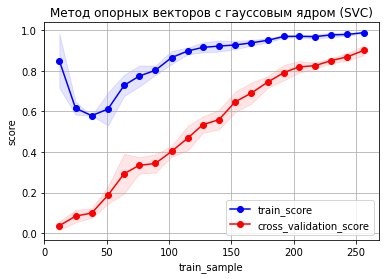

0.0017981529235839844 seconds время обучения модели KNeighborsClassifier


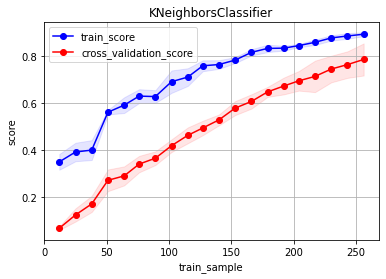

9.705097913742065 seconds время обучения модели Многослойный перцептрон (MLP)


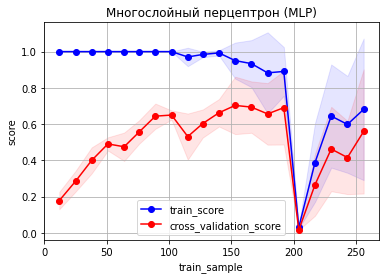

In [ ]:
# Определяем методы

learning_models = {
    "LogisticRegression": LogisticRegression(),
    "Метод опорных векторов с линейным ядром (SVC)": svm.SVC(kernel='linear'),
    "Метод опорных векторов с гауссовым ядром (SVC)": svm.SVC(kernel='rbf'),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "Многослойный перцептрон (MLP)": MLPClassifier(max_iter=300),
}

y_test_predict = dict()
i = 0
for name, model in learning_models.items():
    start_time = time.time()
    model.fit(x_train, y_train)
    print(f"{(time.time() - start_time)} seconds время обучения модели {name}")
    # Строим кривые обучения для каждой модели
    train_sizes, train_scores, test_scores=learning_curve(model, x_train, y_train,train_sizes=[3,6,10],cv=3)
    plot_learning_curve(model, name, x_train, y_train)                 

    y_test_predict[name] = model.predict(x_test)
    df_differences.loc[i] = [name,
                         accuracy_score(y_test, model.predict(x_test)),
                         precision_score(y_test, model.predict(x_test), average='macro'),
                         recall_score(y_test, model.predict(x_test), average='macro'),
                         f1_score(y_test, model.predict(x_test), average='macro')]
    i += 1                

**4. Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;**

In [ ]:
df_differences

,Тип модели классификации,Accuracy_score,Precision_score,Recall_score,F1_score
0,LogisticRegression,0.9625,0.914474,0.907895,0.908521
1,Метод опорных векторов с линейным ядром (SVC),0.9625,0.934211,0.921053,0.922306
2,Метод опорных векторов с гауссовым ядром (SVC),0.8375,0.797436,0.818376,0.800183
3,KNeighborsClassifier,0.8125,0.803724,0.786325,0.775702
4,Многослойный перцептрон (MLP),0.1625,0.084661,0.187500,0.104226
